<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2022)</h2>
<h2 align="center">Lab 8: Decision Trees </h2>

## Import the needed libraries

In [11]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

# Exploring the dataset

## We are going to use a very famous dataset called [Adult Dataset](https://archive.ics.uci.edu/ml/datasets/adult)


The objective of this dataset is to predict whether income exceeds 50,000 dollars per year based on census data. 
So, we will use the decision tree algorithm to predict if an individual earns more than $50K annually and is therefore eligible for the new credit card.


You can read more details here:
https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

### Dataset attributes 

1. age : continuous variable
2. state_sample	: continuous variable
3. education_num : continuous variable
4. capital_gain : continuous variable
5. capital_loss : continuous variable
6. hours_per_week : continuous variable
7. workclass : categorical variable
8. education : categorical variable
9. marital_status : categorical variable
10. occupation : categorical variable
11. relationship	: categorical variable
12. native_country	: categorical variable
13. race : categorical variable
14. income "the label"	: categorical variable


### Load the dataset

In [25]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Describe the dataset

In [36]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
print(f'dataset shape is {data.shape}')

dataset shape is (48790, 15)


In [38]:
print("There are {0} duplicates in the dataset".format(data.duplicated().sum()))

There are 0 duplicates in the dataset


In [39]:
#drop duplicates
data.drop_duplicates(inplace=True)
#check
data.duplicated().sum()

0

In [40]:
data.isna().sum() #no null values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Which ones are categorical and which are numerical?

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


## Data Preprocessing and Exploration

In [48]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [58]:
data = data.rename(columns = {'income':'eligible'})
data.replace(['<=50K','>50K'],[0,1], inplace = True) 
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,eligible
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


<AxesSubplot:xlabel='eligible', ylabel='count'>

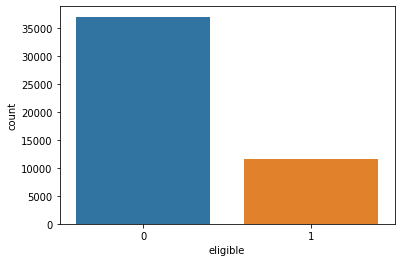

In [59]:
## Is the dataset balanced?

sns.countplot(x='eligible',data=data)

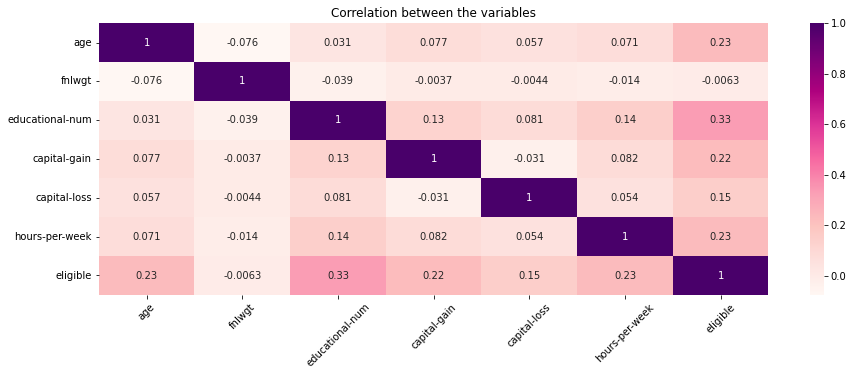

In [60]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
sns.heatmap(data.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

## Training and Testing Datasets

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  eligible         48790 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 7.0+ MB


In [66]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 
                   'relationship', 'race', 'native-country', 'gender' ]
numerical = ['age', 'educational-num','capital-gain', 'capital-loss',
                'hours-per-week', 'fnlwgt']
 
X = pd.concat([data[categorical], data[numerical]], axis=1) ## Just sort them, no need for encoding
y = data['eligible']

#split data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)

# Decision Trees
Nonparametric, supervised alogorithm.
<img src="https://www.tutorialandexample.com/wp-content/uploads/2019/10/Decision-Trees-Root-Node.png" align = 'center' style="width: 600px;">

# What is Entropy ?

**Entropy** quantifies the uncertainity in an entire probability distribution.

$$Entropy\ H(\pi) = -\sum \pi log_2(\pi)$$

<img src="http://photos1.blogger.com/blogger/5682/4111/1600/EntropyVersusProbability.0.png" style="width: 600px;">

source: http://matlabdatamining.blogspot.com/2006/11/introduction-to-entropy.html <br>
Source: https://www.section.io/engineering-education/entropy-information-gain-machine-learning/

## Entropy Implementation 

In [150]:
def entropy(class_y):
    """ 
    Compute the entropy for a list of classes
    
        Input: 
            - class_y: list of class labels (0's and 1's)

        Output: 
            - The entropy         
            
    """
    
    if len(class_y) <=1: ## Handling if there is only 1 or 0 labels left
        return 0
    
    total_count = np.bincount(class_y) # count 0 and 1
    
    probabilities = total_count[np.nonzero(total_count)] / len(class_y) # Find the probabilities
    
    if len(probabilities) <= 1 : ## Handling if the length of the list probabilities is less than or equal to 1
        return 0

    return - np.sum(probabilities * np.log2(probabilities)) ## Entropy equation

In [257]:
#test
entropy([0,0,1,1]) #as expected at all probs = 0.5

0.9182958340544896

# Conditional Entropy & Information Gain

**Conditional Entropy** quantifies the amount of uncertainity of a variable when another variable is known. <br>
**Information gain** represents the amount of reduction in entropy due to the use of attribute to split on.

$$Conditional\ Entropy\ H(Y|X)= -\sum p(Y=y, X=x )\log\frac{p(Y=y, X=x )}{p(X=x)}$$

$$Information\ Gain\ IG(Y|X)= H(Y) - H(Y|X)$$

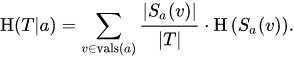

In [152]:
def information_gain(previous_y, current_y):
    """
    Compute and return the information gain from partitioning the previous_y labels into the current_y labels.

        Inputs:
            - previous_y : the distribution of original labels (0's and 1's)
            - current_y  : the distribution of labels after splitting based on a particular
                         split attribute and split value

        Outputs:
            - info_gain : The information gain after partitioning
        
    
    """ 
    conditional_entropy = 0 ## IG = H(Y) - CE(Y|X)
    condition1 =0
    
    for y in current_y:
        conditional_entropy += (entropy(y)*len(y)/len(previous_y))
  

    info_gain = entropy(previous_y) - conditional_entropy
    return info_gain


### Test the information gain and the entropy implementations

In [153]:
# TEST CASE
test_class_y = [0,0,0,1,1,1,1,1]
print(entropy(test_class_y))
 
previous_y = [0,0,0,1,1,1]
current_y = [[0,0], [1,1,1,0]]
print(information_gain(previous_y, current_y))

0.954434002924965
0.4591479170272448


# The Decision Tree ID3 algorithm
1. Find best feature
2. Find best split for the best feature
3. Parition classes based on steps 1 and 2

## Step 3 : partition_classes

- One of the basic operations is to split a tree on one attribute - step 1 - with a specific value for that attribute - step 2.


- We need to also take into consideration if the split attribute is either a numerical or categorical.


In [154]:
def partition_classes(X, y, split_attribute, split_val):
    """
    Partition the data(X) and labels(y) based on the split value    

            Inputs:
            - X               : (N,D) list containing all data attributes
            - y               : a list of labels
            - split_attribute : column index of the attribute to split on
            - split_val       : either a numerical or categorical value to divide the split_attribute

            Outputs:
            - X_left          : X left after partitioning
            - X_right         : X right after partitioning
            - y_left          : y left after partitioning
            - y_right         : y right after partitioning
    
    """
    """
    Example:
    
    X = [[3, 'aa', 10],                 y = [1,
         [1, 'bb', 22],                      1,
         [2, 'cc', 28],                      0,
         [5, 'bb', 32],                      0,
         [4, 'cc', 32]]                      1]
    
    Here, columns 0 and 2 represent numeric attributes, while column 1 is a categorical attribute.
    
    Consider the case where we call the function with split_attribute = 0 (the index of attribute) and 
            split_val = 3 (the value of attribute).
            
    Then we divide X into two lists - X_left, where column 0 is <= 3 and X_right, where column 0 is > 3.
    
    X_left = [[3, 'aa', 10],                 y_left = [1,
              [1, 'bb', 22],                           1,
              [2, 'cc', 28]]                           0]
              
    X_right = [[5, 'bb', 32],                y_right = [0,
               [4, 'cc', 32]]                           1]

    Consider another case where we call the function with split_attribute = 1 and split_val = 'bb'
    Then we divide X into two lists, one where column 1 is 'bb', and the other where it is not 'bb'.
        
    X_left = [[1, 'bb', 22],                 y_left = [1,
              [5, 'bb', 32]]                           0]
              
    X_right = [[3, 'aa', 10],                y_right = [1,
               [2, 'cc', 28],                           0,
               [4, 'cc', 32]]                           1]
               
    """
    
    X = np.array(X)
    column_split = X[:,split_attribute]
    
    X_left=[]
    y_right = []
    X_right = []
    y_left = []
    
    counter=0 ## Counter for appending

    if isinstance(split_val,str) == False: ## Numerical attribute
        
        for i in column_split:
            if i <= split_val:
                X_left.append(X[counter])
                y_left.append(y[counter])
            else:
                X_right.append(X[counter])
                y_right.append(y[counter])
            
            counter+=1
            
    else: ## Categorical attribute
        
        for i in column_split:
            
            if i == split_val: ## == and NOT <=
                X_left.append(X[counter])
                y_left.append(y[counter])
            else:
                X_right.append(X[counter])
                y_right.append(y[counter])
            
            counter+=1

    return X_left, X_right, y_left, y_right 

## Step 2 : Find Best Split

- In this step, we find the *order* of features splitting. 


- To do so, we calculate the information gain of each value in the attribute list. 


- Then, we find the optimal split value. This corresponds to the one with the highest information gain


In [189]:
def find_best_split(X, y, split_attribute):
    
    """
    Compute and return the optimal split value for a given attribute, along with the corresponding information gain

        Inputs:
            - X               : (N,D) list containing all data attributes
            - y               : a list array of labels
            - split_attribute : Column of X on which to split

        Outputs:
            - best_split_val  : optimal split value for a given attribute
            - best_info_gain  : the corresponding information gain
    
    """
    
    """
    
      Example:
    
        X = [[3, 'aa', 10],                 y = [1,
             [1, 'bb', 22],                      1,
             [2, 'cc', 28],                      0,
             [5, 'bb', 32],                      0,
             [4, 'cc', 32]]                      1]
    
        split_attribute = 0
        
        Starting entropy: 0.971
        
        Calculate information gain at splits:
           split_val = 1  -->  info_gain = 0.17
           split_val = 2  -->  info_gain = 0.01997
           split_val = 3  -->  info_gain = 0.01997
           split_val = 4  -->  info_gain = 0.32
           split_val = 5  -->  info_gain = 0
        
       best_split_val = 4; info_gain = .32; 
    """
    
    
    best_info_gain = 0 # Initialize the best information gain
    
    X = np.array(X)
    column_split = X[:,split_attribute]

    column_split = np.unique(column_split) ## Get the unique values only !
    best_split_val = column_split[0] ## Set the best split as the initial one ( in case it is the only one)

    for split_val in column_split:
        current_X_left, current_X_right, current_y_left, current_y_right = partition_classes(X, y, split_attribute, split_val) ## Call the partition classes function
        
        current_y = []
        current_y.append(current_y_left)
        current_y.append(current_y_right)

        current_info_gain = information_gain(y,current_y) ## Calculate the information gain
        
        if current_info_gain > best_info_gain: ## check if it is better than before
            best_info_gain = current_info_gain
            best_split_val = split_val

    return best_split_val, best_info_gain

## Step 1 : Find Best Feature

- We use steps 2 and 3 to find the best feature

In [190]:
def find_best_feature(X, y):
    """
    Compute and return the optimal attribute to split on and optimal splitting value

            Inputs:
                - X              : (N,D) list containing all data attributes
                - y              : a list of labels

            Outputs:
                - best_feature   : Best Feature to split on
                - best_split_val : Best Split Value for this feature
        
    """
    
    """
        
    Example:
    
        X = [[3, 'aa', 10],                 y = [1,
             [1, 'bb', 22],                      1,
             [2, 'cc', 28],                      0,
             [5, 'bb', 32],                      0,
             [4, 'cc', 32]]                      1]
    
        split_attribute = 0
        
        Starting entropy: 0.971
        
        Calculate information gain at splits:
           feature 0:  -->  info_gain = 0.32
           feature 1:  -->  info_gain = 0.17
           feature 2:  -->  info_gain = 0.4199
        
       best_split_feature: 2 best_split_val: 22
    """
    
    
    best_info_gain = 0
    best_feature = 0
    best_split_val = 0
    
    for feature_index in range(len(X[0])): ## Loop over the features , find the best split 

        current_best_split_val, current_best_info_gain =  find_best_split(X, y,  feature_index)
        
        if current_best_info_gain > best_info_gain:
            
            best_info_gain = current_best_info_gain
            best_feature = feature_index
            best_split_val = current_best_split_val
            
    return best_feature, best_split_val

# Decision Tree ID3 Full Algorithm : Putting Everything Together

- We will use a recursive algorithm, so we need to have a base case - a stopping condition for splitting- . It can be one of the following:

    - If all data points in that node have the same label

    - If the current node is at the maximum depth. In this case, you may assign the mode of the labels as the class label


- We are going to use a class, so you might need to revise the OOP part in the first lab.


- We are going to use a dictionary to store the tree information. It will contain the class labels, feature and value to split, and reference to the right and left children.

- For example:
```
 node = {
            'isLeaf': False,
            'split_attribute': 1,
            'split_value': 3,
            'is_categorical': True,
            'leftTree': leftTree,  --> This is a instance of the class itself
            'rightTree': rightTree --> This is a instance of the class itself
        };
```


<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png">
<br/> 
<br/> 
source: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [194]:
class MyDecisionTree(object):
    
    def __init__(self, max_depth=None):
        """        
            Args:
                max_depth: maximum depth of the tree including the root node.
        """
        self.tree = {}
        self.residual_tree = {} ## For prediction
        self.max_depth = max_depth

        
    def fit(self, X, y, depth):
        """
            Args:
                X     : N*D matrix corresponding to the data points
                Y     : N*1 array corresponding to the labels of the data points
                depth : depth of node of the tree

            Output:
                node : A dictionary that contains this node information
        """

        # base cases
        unique_labels = np.unique(y) 
        
        ## Check if we reached the maximum depth: we then assign the class according to the majority
        # or all remaining are of same class: by default, it is the majority, so, it is assigned to that class
        if (len(unique_labels)==1) or (depth == max_depth): 
            unique_labels, counts_unique_labels = np.unique(y, return_counts=True)
            index = counts_unique_labels.argmax() #returns index of the max value
            classification = unique_labels[index]    
            return classification

        #split the data according to the best attribute:
        # Step 1: Find best feature 
        # Step 2: Split on this feature 
        # Split 3: Partition on the best feature and split 

        best_feat, best_split  = find_best_feature(X, y) 
        X_left, X_right, y_left, y_right = partition_classes(X, y, best_feat, best_split) 
        
        #if the best split is categorical?
        if isinstance(best_split,str):
            question = "{} == {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
        
        else: #numerical feature
            question = "{} <= {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
        
        node = {question: []}
        
        """                              ...
                                          .
                                {Weather} == {Rainy}
                                .                    .
                            .                            .
                        Yes_tree                           No_tree
                {Another_Attr} == {Value}          {Another_Attr} == {Value}
        """
        
        # find answers (recursion) by splitting the result trees
        
        depth+=1 
        yes_answer = self.fit(X_left,y_left, depth)  # RECURSION on the left sub tree
        no_answer = self.fit(X_right, y_right, depth) ## RECURSION on the right sub tree
        
        if yes_answer == no_answer: ## Both trees are the same
            node = yes_answer
        else:
            node[question].append(yes_answer) ## Append the questions to the answers
            node[question].append(no_answer)
        
        self.tree = node ## The tree is equal to the node
        return node
        
    def predict(self, record,flag=1):
        """
        classify a sample in test data set using self.tree and return the predicted label
            Args:
                record: D*1, a single data point that should be classified
        
            Output:
                 prediction: True if the predicted class label is 1, False otherwise      
        
        """
        if flag == 1: ## First time
            self.residual_tree = self.tree
        question = list(self.residual_tree.keys())[0]
        feature, comparison, value = question.split() ## Split the question to get the feature and its value

        ## Check if str or int
        if comparison == "==": # String
            if record[int(feature)] == value:
                answer = self.residual_tree[question][0]  ## Left sub tree
            else:
                answer = self.residual_tree[question][1] ## Right sub-tree
        elif comparison == "<=": #Integer
            if record[int(feature)] <= float(value):
                answer = self.residual_tree[question][0] ## Right Sub-tree
            else:
                answer = self.residual_tree[question][1] ## Left sub-tree        try: ## Integer
                
        # base case
        if not isinstance(answer, dict):  ## If we have the answer
            return answer
    
        # recursion
        else:
            self.residual_tree = answer ## The residual tree is the answer !
            return self.predict(record,0) ## have flag = 0 so the residual tree is our sub-problem

### Evaluation Function

In [195]:
def DecisionTreeEvalution(id3,X,y, verbose=False):
    """ Calculate the Accuracy of our decision tree
            Inputs:
                id3: a tree object
                X: features
                y: labels
                verbose: whether to print the accuracy or not
    """
    y_predicted = []
    for record in X: 
        y_predicted.append(id3.predict(record)) #predict records
        
    # Comparing predicted and true labels
    results = [prediction == truth for prediction, truth in zip(y_predicted, y)]
    # Accuracy
    accuracy = float(results.count(True)) / float(len(results))
    if verbose:
        print("accuracy: %.4f" % accuracy)
    return accuracy

# Testing our Implementation

In [159]:
#### Convert the dataframes to numpy arrays as our implementation works on NumPy arrays
X_train , X_test , y_train , y_test = X_train.to_numpy() , X_test.to_numpy() , y_train.to_numpy() , y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [196]:
max_depth = 7
inital_depth = 0
id3_dt = MyDecisionTree(max_depth)

# Building a tree
print("Fitting the decision tree with maximum depth {}".format(max_depth))
id3_dt.fit(X_train, y_train, inital_depth)

# Evaluating the decision tree
print("Accuracy = {} %".format(np.round(DecisionTreeEvalution(id3_dt,X_test,y_test),2)*100))

Fitting the decision tree with maximum depth 7
Accuracy = 85.0 %


## What is the final tree

In [233]:
def print_nested_dict(d):
    node = list(d.keys())[0] #root
    
    print(node, ':')
    #left tree
    print('Left tree')
    if isinstance(d[node][0], dict):
        print_nested_dict(d[node][0])
    else: print(d[node])
    #right
    print('Right tree')
    if isinstance(d[node][1], dict):
        print_nested_dict(d[node][1])
    else: print(d[node])
    
print_nested_dict(id3_dt.tree)

2 == Married-civ-spouse :
Left tree
10 <= 5013 :
Left tree
9 <= 12 :
Left tree
9 <= 8 :
Left tree
[0, {'11 <= 1844': [0, {'11 <= 1977': [1, 0]}]}]
Right tree
11 <= 1844 :
Left tree
[0, {'11 <= 1977': [1, 0]}]
Right tree
11 <= 1977 :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
11 <= 1740 :
Left tree
12 <= 31 :
Left tree
4 == Wife :
Left tree
13 <= 104620 :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
[{'13 <= 104620': [0, 1]}, 0]
Right tree
1 == Bachelors :
Left tree
8 <= 25 :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
10 <= 0 :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
11 <= 1977 :
Left tree
0 == Federal-gov :
Left tree
8 <= 47 :
Left tree
[1, 0]
Right tree
[1, 0]
Right tree
[{'8 <= 47': [1, 0]}, 1]
Right tree
11 <= 2163 :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
8 <= 60 :
Left tree
6 == South :
Left tree
1 == HS-grad :
Left tree
[0, 1]
Right tree
[0, 1]
Right tree
[{'1 == HS-grad': [0, 1]}, 1]
Right tree
10 <= 10566 :
Left tree
10 <= 9386 :
Left tree
10 <= 6767 :
Left t

In [234]:
id3_dt.tree

{'2 == Married-civ-spouse': [{'10 <= 5013': [{'9 <= 12': [{'9 <= 8': [0,
        {'11 <= 1844': [0, {'11 <= 1977': [1, 0]}]}]},
      {'11 <= 1740': [{'12 <= 31': [{'4 == Wife': [{'13 <= 104620': [0, 1]},
            0]},
          {'1 == Bachelors': [{'8 <= 25': [0, 1]}, {'10 <= 0': [1, 0]}]}]},
        {'11 <= 1977': [{'0 == Federal-gov': [{'8 <= 47': [1, 0]}, 1]},
          {'11 <= 2163': [0, 1]}]}]}]},
    {'8 <= 60': [{'6 == South': [{'1 == HS-grad': [0, 1]}, 1]},
      {'10 <= 10566': [{'10 <= 9386': [{'10 <= 6767': [{'10 <= 6514': [1, 0]},
            1]},
          0]},
        {'3 == Farming-fishing': [{'8 <= 63': [0, 1]}, 1]}]}]}]},
  {'10 <= 6849': [{'9 <= 12': [{'8 <= 26': [{'11 <= 2339': [0, 1]},
        {'12 <= 40': [0, {'11 <= 2206': [0, {'11 <= 2339': [0, 1]}]}]}]},
      {'8 <= 27': [{'11 <= 2205': [0,
          {'3 == Exec-managerial': [1, {'0 == Self-emp-not-inc': [1, 0]}]}]},
        {'12 <= 42': [{'11 <= 2339': [0, {'11 <= 3683': [1, 0]}]},
          {'9 <= 14': [0

# Compare with Sklearn Decision Tree

Sklearn decision tree implementation can't handle categorical data 


https://github.com/scikit-learn/scikit-learn/issues/5442

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

In [259]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 75, shuffle=True)
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
 


In [260]:
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [261]:
y_pred = clf.predict(X_test)
print("Accuracy:",np.round(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 85.0


# Visualize the tree

In [256]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_30 <= 0.50
|   |--- feature_2 <= 7055.50
|   |   |--- feature_1 <= 12.50
|   |   |   |--- feature_0 <= 28.50
|   |   |   |   |--- feature_3 <= 2391.50
|   |   |   |   |   |--- feature_4 <= 44.50
|   |   |   |   |   |   |--- feature_0 <= 21.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  21.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  44.50
|   |   |   |   |   |   |--- feature_38 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_38 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  2391.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  28.50
|   |   |   |   |--- feature_4 <= 40.50
|   |   |   |   |   |--- feature_44 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 2218.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  2218.50
|   |   |   |   |   |   |   |--- class: 0
|   |   

# What the most important hyper parameters in DT ?

- ``criterion`` : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.


- ``splitter`` : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


- ``max_depth`` : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting 


- ``min_samples_split`` : int or float, default=2 . The minimum number of samples required to split an internal node


- ``class_weight``: dict, list of dict or “balanced”, default=None

## Hyperparameter tuning

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [240]:
clf = tree.DecisionTreeClassifier()

print("Start fitting the data")

hp = {"criterion":['gini','entropy'], 'max_depth':np.arange(3,9)}

for cv in tqdm(range(2,6)):
    grid = GridSearchCV(clf, param_grid  = hp  , cv = cv)
    grid.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid.score(X_test,y_test)}")
    print(f"Best result {grid.best_params_}")

Start fitting the data


  0%|          | 0/4 [00:00<?, ?it/s]

score for 2 fold CV is : 0.8417708546833368
Best result {'criterion': 'entropy', 'max_depth': 8}
score for 3 fold CV is : 0.8425906948145112
Best result {'criterion': 'gini', 'max_depth': 8}
score for 4 fold CV is : 0.8425906948145112
Best result {'criterion': 'gini', 'max_depth': 8}
score for 5 fold CV is : 0.8425906948145112
Best result {'criterion': 'gini', 'max_depth': 8}


# Avoiding Overfitting :

1. Acquire more training data


2. Remove irrelevant attributes


3. **Grow full tree, then post-prune** 


4. Ensemble learning -> Random Forests


## Pruning

We can perform the pruning either before building the fully grown tree **(pre-pruning)** or after building it **(post-pruning)**.

- We have already performed pre-pruning by specifiying the maximum depth in our implementation, or by controlling the different hyperparameters in sklearn implementation such as the min_samples_split and max_depth.


- However, this approach is not preferred or shouldn't be used alone, because a seemingly worthless split early on in the tree might be followed by a very good split.


- Therefore, it should be combined with post-pruning, also known as **cost-complexity pruning and as weakest link pruning**.

We can perform post-purning to prune the fully grown tree in a **bottom-up manner**.

- The idea is basically about, starting at the leaves, each node is replaced with its most popular class.


- If the prediction accuracy is not affected then the change is kept. 



We can also explain it as follows :

- Rather than considering every possible subtree, we consider a sequence of trees indexed by a nonnegative tuning parameter α (as α increases, more branches get pruned from the tree).


- For each value of α there corresponds a subtree where $$T ⊂ T_0$$ such that: <br>
 $$Cost(T) = Error(T_0) + α |T|$$ is small as possible.


- The variable $|T|$ indicates the number of terminal nodes of the tree T.


- The tuning parameter α controls a trade-off between the subtree’s complexity and its fit to the training data. When α = 0, then the subtree T will simply equal $T_0$ as we increase α from zero, branches get pruned from the tree.

In [247]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 75, shuffle =True)

X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
 


,age,educational-num,capital-gain,capital-loss,hours-per-week,fnlwgt,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,gender_Male
40927,35,9,0,0,40,144608,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
24222,52,11,0,0,32,84451,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7942,52,9,0,0,60,30908,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
25724,38,9,0,0,40,169672,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1880,23,10,0,1504,40,121568,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,38,5,0,0,40,61343,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
37955,23,10,0,0,40,312017,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
42013,64,16,0,0,60,98586,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
19345,41,9,0,0,40,79797,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [248]:
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth)
path = clf.cost_complexity_pruning_path(X_train, y_train) ## Pruning !

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

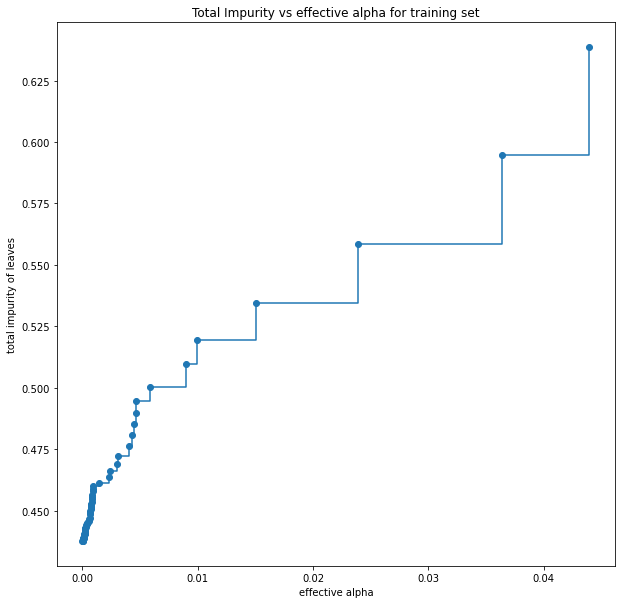

In [249]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities ## Alpha we have been talking about
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective ``alphas``. The last value in ``ccp_alphas`` is the alpha value that prunes the whole tree, leaving the tree, ``clfs[-1]``, with one node.

In [250]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1544159865479816


Now, we remove the last element in ``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one node.


Here we show that the number of nodes and tree depth decreases as alpha increases.

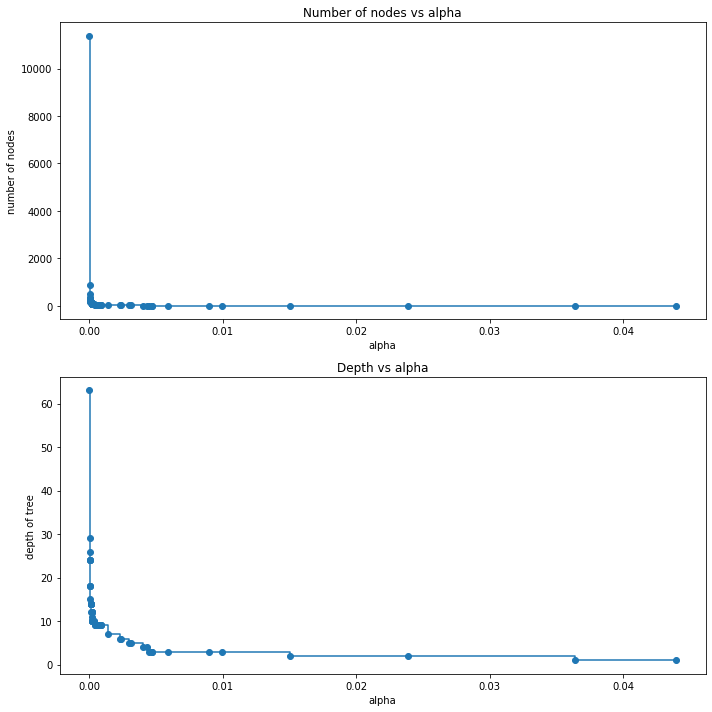

In [251]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1,figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

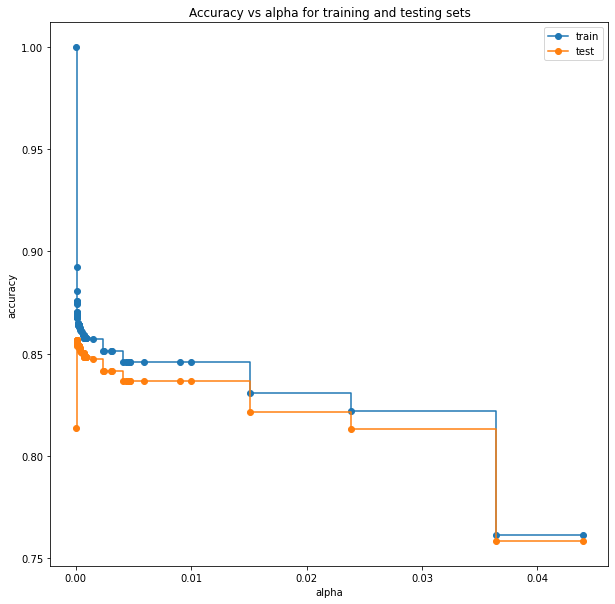

In [252]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* As we can see, When ``ccp_alpha`` is set to ``zero`` and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a ``97.5%`` training accuracy and ``80%`` testing accuracy.


* As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.Setting ``ccp_alpha=8.70266265e-05`` maximizes the testing accuracy

# Random Forests

<img src ="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg">

# Decision Tree Pros and Cons


| Pros | Cons
| --- | --- 
|Easy to interpret and visualize.| Sensitive to noisy data. It can overfit noisy data.
|Has no assumptions about distribution because of the non-parametric nature of the algorithm.|The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
|Can easily capture Non-linear patterns.|Biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.
|It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.|Greedy algorithms don’t yield the global optimum tree structure.
|It can be used for feature engineering such as predicting missing values, suitable for variable selection.| As the branching goes deeper, you get exponentially less data.
|It has no problem whether the inputs and outputs are binary, categorical or continuous